# Week 3: Clustering


In this workshop, we will work through a set of problems clustering, another cannonical form of unsupervised learning. Clustering is an important tool that is used to discover homogeneous groups of data points within a heterogeneous population. It can be the main goal in some problems, while in others it may be used in EDA to understand the main types of behavior in the data or in feature engineering.   

We will start by generating some artificial data, and then we will utilize clustering algorithms described in lectures and explore the impact of feature engineering on the solution. We will then attempt to find clusters in a gene expression dataset. 

As usual, the worksheets will be completed in teams of 2-3, using **pair programming**, and we have provided cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday of the week the workshop was given. 

As you work through the problems it will help to refer to your lecture notes (navigator). The exercises here are designed to reinforce the topics covered this week. Please discuss with the tutors if you get stuck, even early on! 

## Outline

1. [Problem Definition and Setup: Simulated Example](#setup1)
2. [K-means: Simulated Example](#kmeans1)
3. [Hierarchical Clustering: Simulated Example](#hc)
4. [Gene Expression Data](#genedata)
5. [Hierarchical Clustering: Gene Expression Data](#hc_genedata)
6. [K-means Clustering: Gene Expression Data](#kmeans_genedata)

# Problem Definition and Setup: Simulated Example <a id='setup1'></a>

## Packages

First, lets load in some packages to get us started. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

## Data: Simulated Example

We will begin with a simple simulated example in which there are truly three clusters. We assume that there are $D=2$ features and within each cluster, the data points are generated from a spherical normal distribution $N(\mathbf{m}_k, \sigma^2_k \mathbf{I})$ for clusters $k=1,2,3$, where both the mean $\mathbf{m}_k$ and variance $\sigma^2_k$ are different across clusters. Specifically, we assume that: 

* Cluster 1: contains $|C_1|=500$ points with mean vector $\mathbf{m}_1 = \begin{pmatrix} 0 \\ 4 \end{pmatrix}$ with standard deviation $\sigma_1 = 2$.
* Cluster 2: contains $|C_2|=250$ points with mean vector $\mathbf{m}_2 = \begin{pmatrix} 0 \\ -4 \end{pmatrix}$ with standard deviation $\sigma_2 = 1$.
* Cluster 3: contains $|C_3|=100$ points with mean vector $\mathbf{m}_3 = \begin{pmatrix} -4 \\ 0 \end{pmatrix}$ with standard deviation $\sigma_3 = 0.5$.

Run the following code to generate the dataset described above.

In [2]:
# Number of features
D = 2

# Cluster sizes
N_1 = 500
N_2 = 250
N_3 = 100

# Cluster means
m_1 = np.array([0., 4.])
m_2 = np.array([0., -4.])
m_3 = np.array([-4., 0.])

# Cluster standard deviations
sd_1 = 2.
sd_2 = 1.
sd_3 = 0.5

# Generate the data
rnd = np.random.RandomState(5)
X_1 = rnd.normal(loc = m_1, scale = sd_1, size = (N_1,D))
X_2 = rnd.normal(loc = m_2, scale = sd_2, size = (N_2,D))
X_3 = rnd.normal(loc = m_3, scale = sd_3, size = (N_3,D))
X = np.vstack((X_1, X_2, X_3))

# Save true cluster labels
cl = np.hstack((np.repeat(1,N_1),np.repeat(2,N_2),np.repeat(3,N_3)))

In [3]:
# Check that the size is correct
print(X.shape)

(850, 2)


### 🚩 Exercise 1 (CORE)

Visualise the data and color by the true cluster labels.

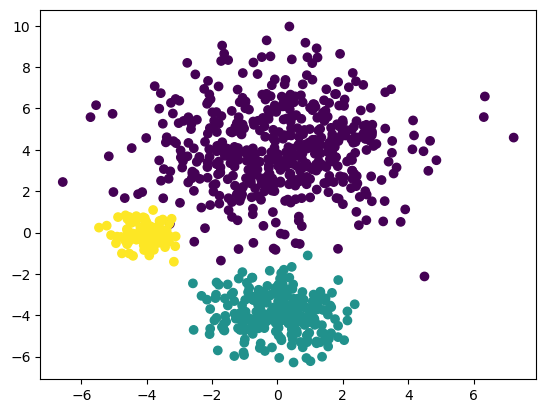

In [4]:
# Plot the data and color by cluster membership
plt.scatter(X[:,0], X[:,1], c=cl)
plt.show()

# K-means Clustering: Simulated Example <a id='kmeans1'></a>

To perform K-means clustering, we will use `KMeans()` in `sklearn.cluster`. Documentation is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), and for an overview of clustering methods available in `sklearn`, see [link](https://scikit-learn.org/stable/modules/clustering.html). There are different inputs we can specify when calling `KMeans()` such as:

- `n_clusters`: the number of clusters. 
- `init`: which specifies the intialization of the centroids, e.g. can be set to `k-means++` for K-means++ initialization or `random` for random initialization.
- `n_init`: which specifies the number of times the algorithm is run with different random initializations
- `random_state`: this can bet set to a fixed number to make results reproducible.

We can then use the `.fit()` method of `KMeans` to run the K-means algorithm on our data.

After fitting, some of the relevant attributes of interest include:

- `labels_`: cluster assignments of the data points.
- `cluster_centers_`: mean corresponding to each cluster, stored in a matrix of size: number of clusters $K$ times number features $D$.
- `inertia_`: the total within-cluster variation.

### 🚩 Exercise 2 (CORE)

Let's start by exploring how the clustering changes across the K-means iterations. To do, set:

- number of clusters to 3
- initialization to random
- number of times the algorithm is run to 1
- fix the random seed to a number of your choice (e.g. 0)


a) Now, fit the K-means algorithms with different values of the maximum number of iterations fixed to 1,2,3, and the default value of 300. 

b) Plot the clustering solution for the four different cases and comment on how it changes. 

c) How many iterations are needed for the convergence?
<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- To find the number of iterations, check the attributes of [`KMeans`](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
    
</details>

In [5]:
# Part a
num_clusters = 3

np.random.seed(0)

max_one = KMeans(n_clusters=num_clusters, max_iter=1).fit(X)
max_two = KMeans(n_clusters=num_clusters, max_iter=2).fit(X)
max_three = KMeans(n_clusters=num_clusters, max_iter=3).fit(X)
max_iter = KMeans(n_clusters=num_clusters).fit(X)

Text(0.5, 1.0, 'max iter 300')

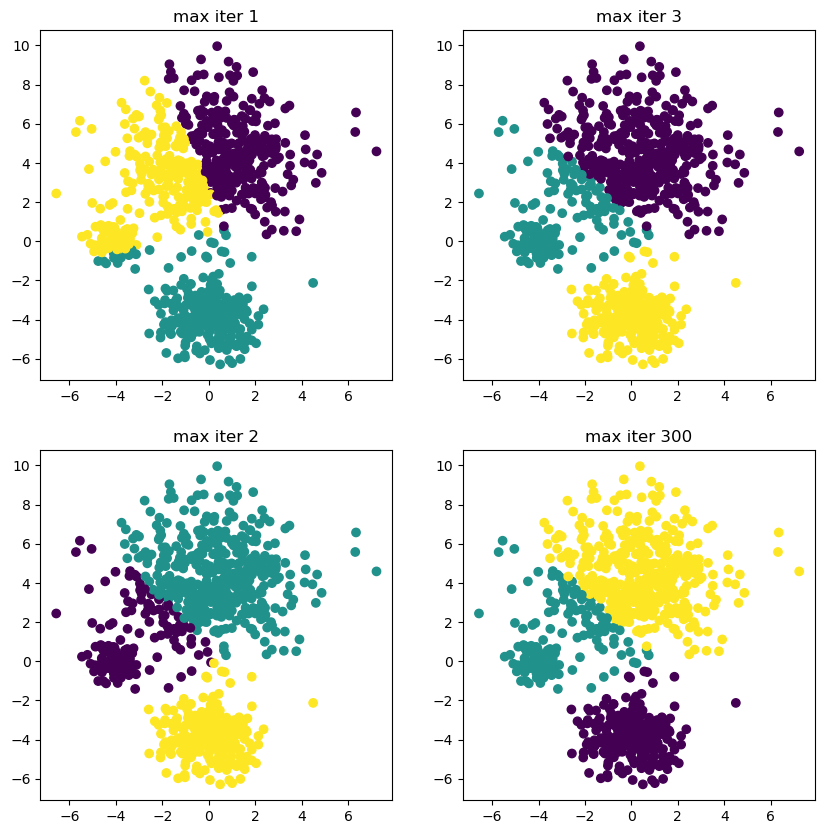

In [6]:
# Part b

# four scatter plots in one figure

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(X[:,0], X[:,1], c=max_one.labels_)
axs[0, 0].set_title('max iter 1')
axs[1, 0].scatter(X[:,0], X[:,1], c=max_two.labels_)
axs[1, 0].set_title('max iter 2')
axs[0, 1].scatter(X[:,0], X[:,1], c=max_three.labels_)
axs[0, 1].set_title('max iter 3')
axs[1, 1].scatter(X[:,0], X[:,1], c=max_iter.labels_)
axs[1, 1].set_title('max iter 300')

As the iterations progress from 1 to 2 to 3. We observe that the 3rd iteration has reached the max iteration of 300.

In the first iteration, the algorithm captures much more overlaping data when it shouldn't, by the 3rd iteration this has been largely corrected.

In [7]:
# Part c
max_iter.n_iter_

5

The algorithm needed 5 iterations to converge.

### 🚩 Exercise 3 (CORE)

Next, compare the random intialization with K-means++ (in this case fix the number of different initializations to 10). Plot both clustering solutions. Which requires fewer iterations? and which provides a lower within-cluster variation?

In [8]:
plus_plus = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10).fit(X)

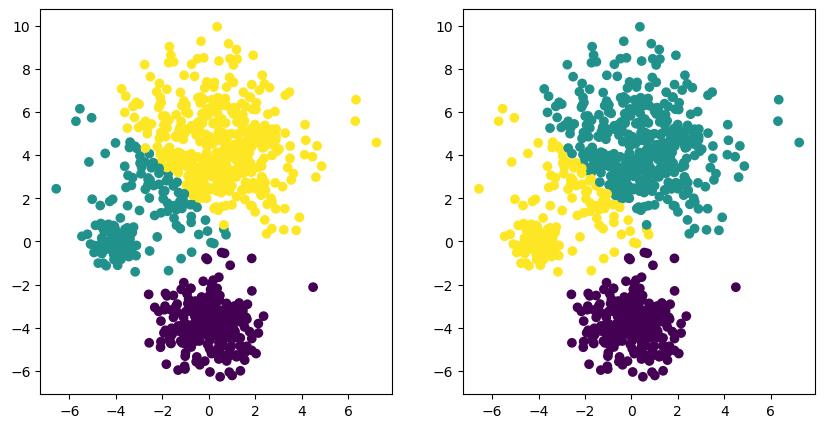

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:,0], X[:,1], c=max_iter.labels_)
axs[1].scatter(X[:,0], X[:,1], c=plus_plus.labels_)

In [10]:
print(plus_plus.n_iter_, plus_plus.inertia_)
print(max_iter.n_iter_, max_iter.inertia_)

4 3833.282646884114
5 3833.367971404591


The K-Means++ converges in 4 iterations and has a total within cluster variation which is 0.1 less than the max_iter with random initialisation.

### 🚩 Exercise 4 (CORE)

Find the clustering solution using a different number of initializations equal to 1, 2, 5, 10, and 20. Visualize the results and print the within-cluster variation. Based on the results, how many intializations are needed? Try changing the random state; how does that change your conclusions?

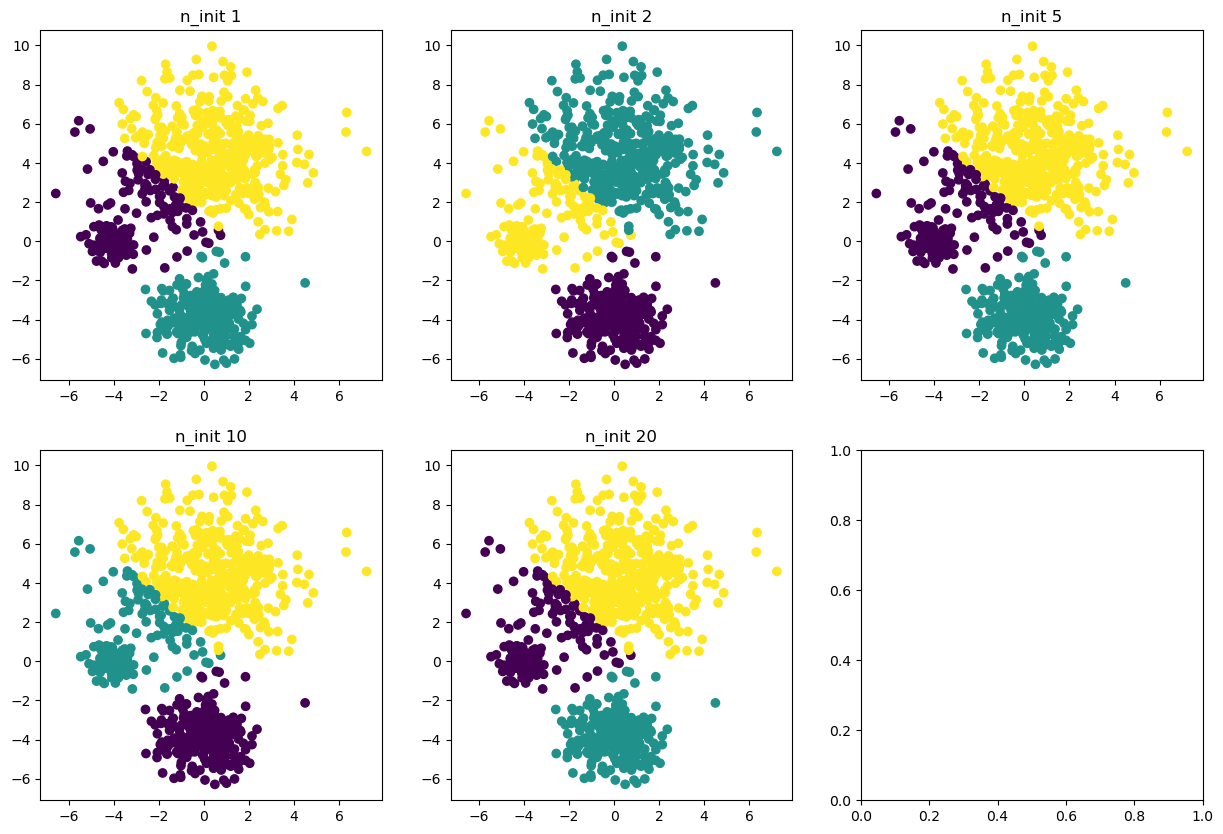

In [11]:
one_init   = KMeans(n_clusters=num_clusters, init='random', n_init=1, random_state=110).fit(X)
two_init   = KMeans(n_clusters=num_clusters, init='random', n_init=2).fit(X)
five_init  = KMeans(n_clusters=num_clusters, init='random', n_init=5).fit(X)
ten_init   = KMeans(n_clusters=num_clusters, init='random', n_init=10).fit(X)
twenty_init  = KMeans(n_clusters=num_clusters, init='random', n_init=20).fit(X)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].scatter(X[:,0], X[:,1], c=one_init.labels_)
axs[0, 0].set_title('n_init 1')
axs[0, 1].scatter(X[:,0], X[:,1], c=two_init.labels_)
axs[0, 1].set_title('n_init 2')
axs[0, 2].scatter(X[:,0], X[:,1], c=five_init.labels_)
axs[0, 2].set_title('n_init 5')
axs[1, 0].scatter(X[:,0], X[:,1], c=ten_init.labels_)
axs[1, 0].set_title('n_init 10')
axs[1, 1].scatter(X[:,0], X[:,1], c=twenty_init.labels_)
axs[1, 1].set_title('n_init 20')
plt.show()

In [12]:
print(one_init.inertia_)
print(two_init.inertia_)
print(five_init.inertia_)
print(ten_init.inertia_)
print(twenty_init.inertia_)

3833.367971404591
3833.3076162106936
3833.282646884114
3833.307616210693
3833.307616210693


With 5 initialisations, we observe a 0.06 reduction in within cluster variation.

🏁 **Now, is a good point to switch driver and navigator**

### 🚩 Exercise 5 (CORE)

Since we simulated the data, we know the true number of clusters. However, in practice this number is rarely known. Find the K-means solution with different choices of $K$ and plot the within-cluster variation as a function of $K$. Comment on the results.

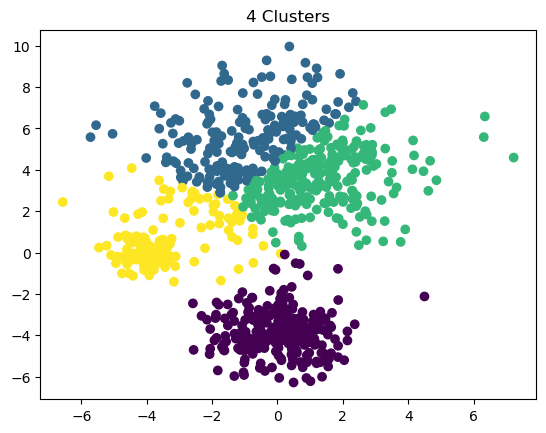

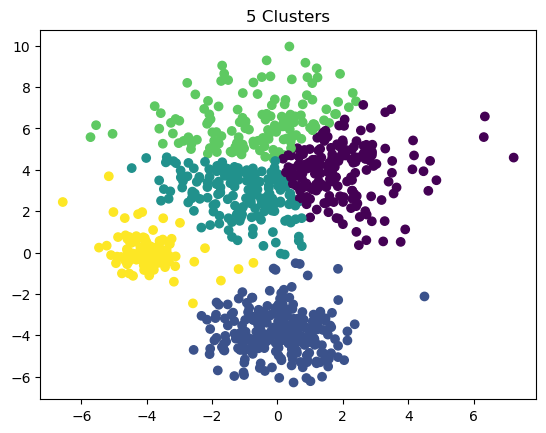

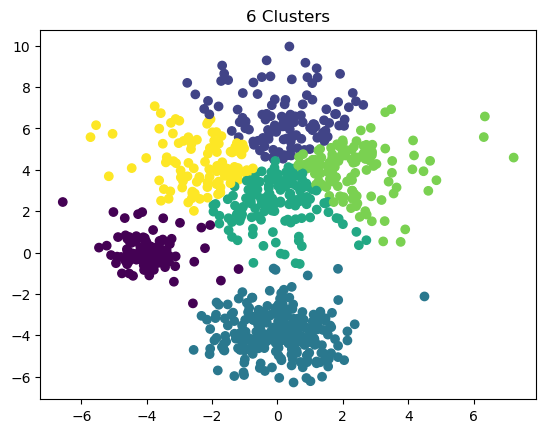

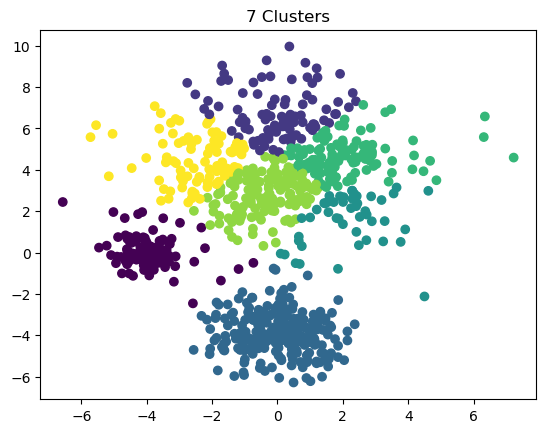

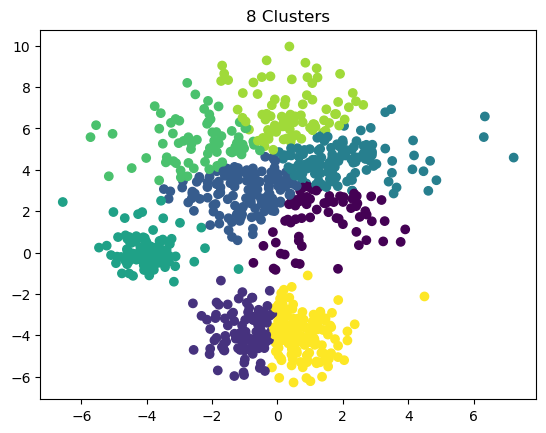

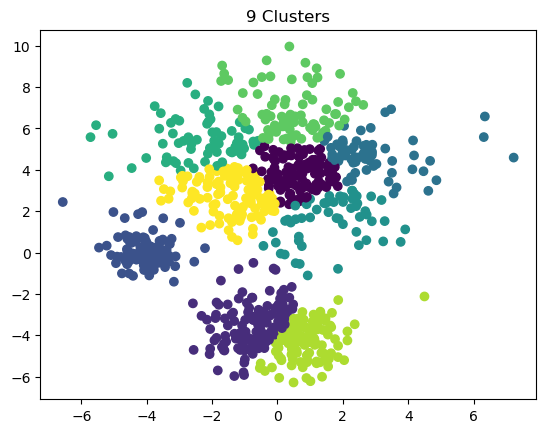

In [13]:

for i in range(4, 10):
    num_clusters = i
    ten_K = KMeans(n_clusters=num_clusters, n_init=10).fit(X)
    plt.scatter(X[:, 0], X[:, 1], c=ten_K.labels_)
    plt.title(f'{num_clusters} Clusters')
    plt.show()

### 🚩 Exercise 6 (CORE)

Now standardize the data and re-run the K-means algorithm. Qualitatively, how has standardising the data impacted performance? Can you argue why you observe what you see?

In [14]:
from sklearn.preprocessing import StandardScaler

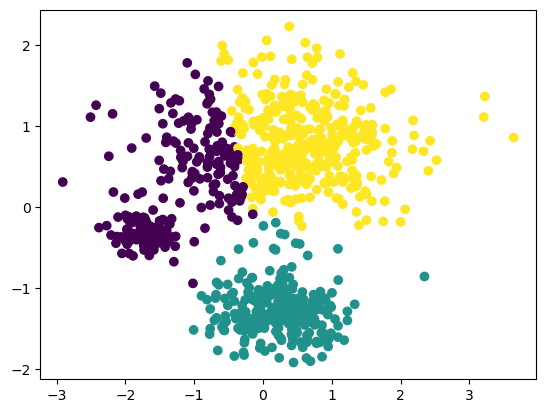

In [15]:
X_scaled = X.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X_scaled)

k_scaled = KMeans(n_clusters=3).fit(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=k_scaled.labels_)

When compared to previous clusters, the purple cluster has more datapoints. This may be because the standardisation has decreased the dissimilarity leading to more cluster overlap.

# Hierarchical Clustering: Simulated Example <a id='hc'></a>

To perform hierarchical clustering, we will use the [`linkage()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function from `scipy.cluster.hierarchy`. The inputs to specify include

-  the data. 
- `metric`: specifies the dissimarlity between data points. Defaults to the Euclidean distance.
- `method`: specifies the type of linkage, e.g. complete, single, or average.

Then, we can use [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) from `scipy.cluster.hierarchy` to plot the dendrogram.

Note that you can also use [`AgglomerativeClustering`](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.AgglomerativeClustering.html) from `sklearn.cluster`, which similarly has options for `metric` to specify the distance and `linkage` to specify the type of linkage. However, `sklearn` does not have its own functions for plotting the dendogram and use must use the tools from `scipy.cluster.hierarchy`.  

### 🚩 Exercise 7 (CORE)

a) Use hierarchical clustering with complete linkage and the Euclidean distance to cluster the simulated data. Name the object `hc_comp`.

In [16]:
# The name of the returned object from hierarchy.linkage should be hc_comp for part b
hc_comp = hierarchy.linkage(X, method='complete')

b) Plot the dendogram by running the code below. Try changing the 'color_threshold' to a number (e.g. 11) to color the branches of the tree below the threshold with different colors, thus, identifying the clusters if the tree were to be cut at that threshold.

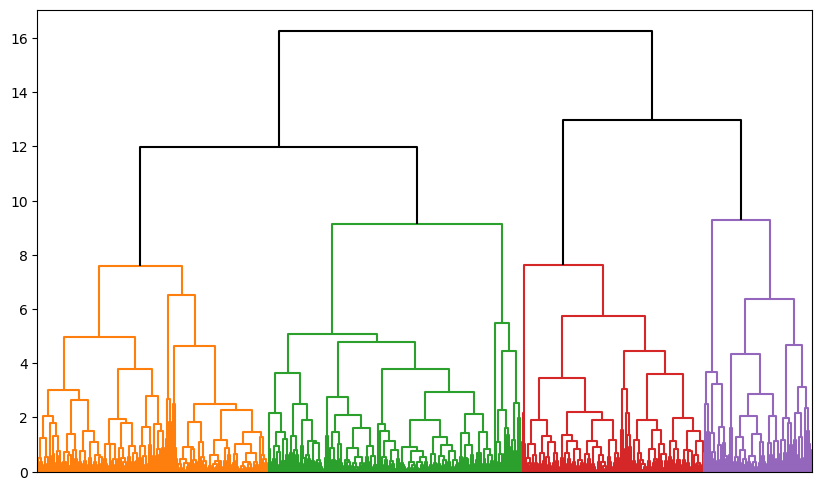

In [17]:
# Plot the dendrogram
cargs = {'color_threshold': 11,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_comp, ax=ax, **cargs, no_labels=True)
plt.show()

c) Now, use the function `cut_tree()` from `scipy.cluster.hierarchy` to determine the cluster labels associated with a given cut of the dendrogram. You can either specify the number of clusters via `n_clusters` or the height/threshold at which to cut via `height`. Plot the data colored by cluster membership.

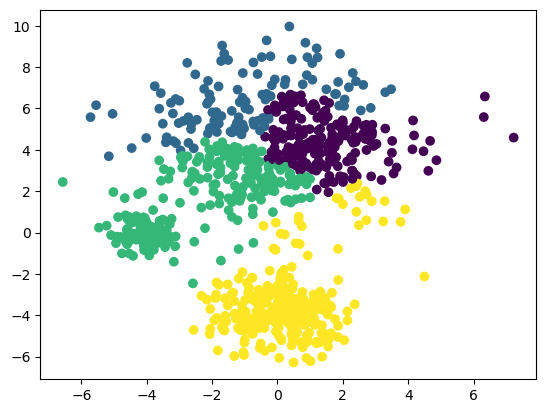

In [18]:
# Cut the tree at a specified number of clusters
c_labels = hierarchy.cut_tree(hc_comp, n_clusters=4)

plt.scatter(X[:,0], X[:,1], c = c_labels)

### 🚩 Exercise 8 (CORE)

Now try changing the linkage to single and average. Does this affect on the results?

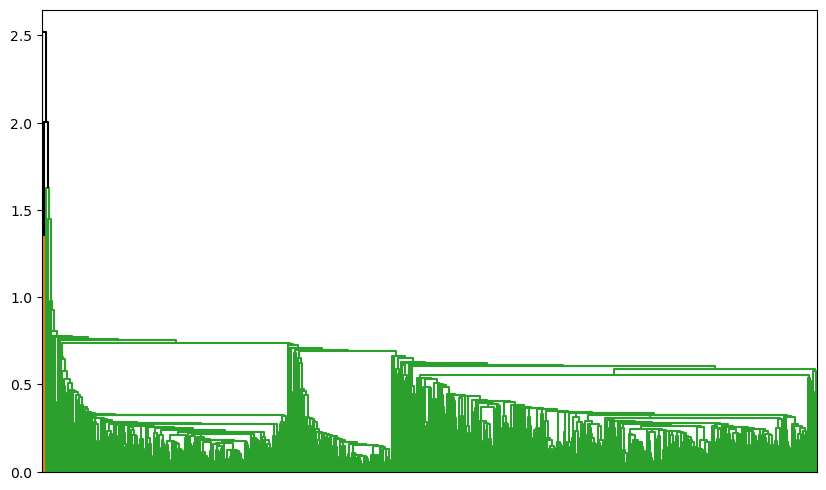

In [19]:
# Change to single linkage, plot the dendrogram, and visualize the clustering solution by cutting the tree
hc_single = hierarchy.linkage(X, method='single')
cargs = {'color_threshold': 2,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_single, ax=ax, **cargs, no_labels=True)
plt.show()

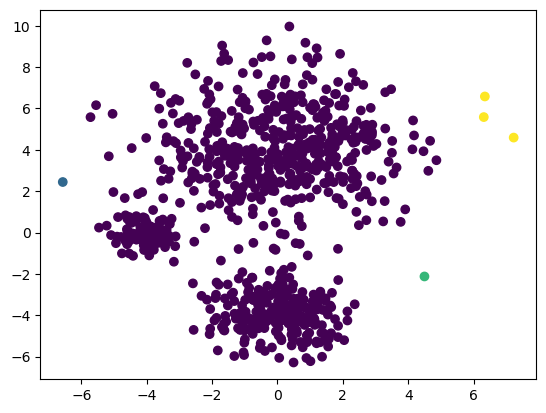

In [20]:
c_labels = hierarchy.cut_tree(hc_single, n_clusters=4)
plt.scatter(X[:,0], X[:,1], c = c_labels)

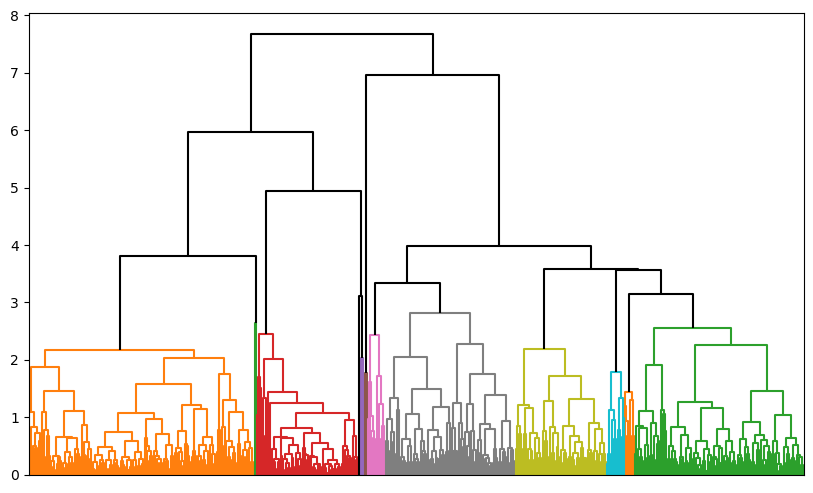

In [21]:
# Change to average linkage, plot the dendrogram, and visualize the clustering solution by cutting the tree
hc_avg = hierarchy.linkage(X, method='average')

cargs = {'color_threshold': 3,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_avg, ax=ax, **cargs, no_labels=True)
plt.show()

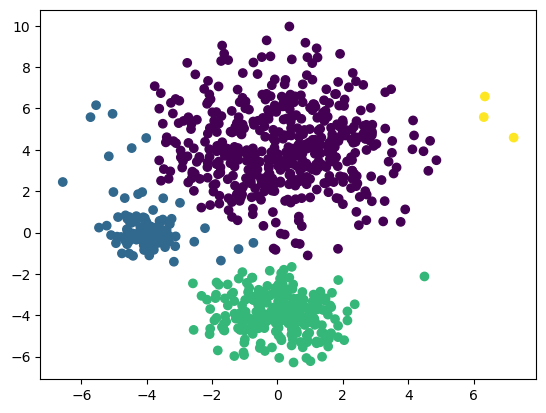

In [22]:
c_labels = hierarchy.cut_tree(hc_avg, n_clusters=4)
plt.scatter(X[:,0], X[:,1], c = c_labels)

Average seems to do the best job capturing the true nature of clustering. When comparing to a human output I would cluster similar to the average clustering.

🏁 **Now, is a good point to switch driver and navigator**

# Gene Expression Data <a id='genedata'></a>

Now, we will consider a more complex real dataset with a larger feature space. 

The dataset is the **NCI cancer microarray dataset** discussed in both *Introduction to Statistical Learning* and  *Elements of Statistical Learning*. The dataset consists of $D=6830$ gene expression measurements for each of $N=64$ cancer cell lines. The aim is to determine whether there are groups among the cell lines with similar gene expression patterns. This is an example of a high-dimensional dataset with $D$ much larger than $N$, which makes visualization difficult. The $N=64$ cancer cell lines have been obtained from samples of cancerous tisses, corresponding to 14 different types of cancer. However, our focus remains unsupervised learning and we will use the cancer labels only to plot. 

We first need to read in the dataset.

In [23]:
#Fetch the data and cancer labels
url_data = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.data.csv'
url_labels = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.label.txt'

X = pd.read_csv(url_data)
y = pd.read_csv(url_labels, header=None)

# clean data and follow convention in the notes that features are columns:
X = X.drop(labels='Unnamed: 0', axis=1).T

In [24]:
X.shape

(64, 6830)

In [25]:
y.shape

(64, 1)

Let's visualise the data with a contour plot.

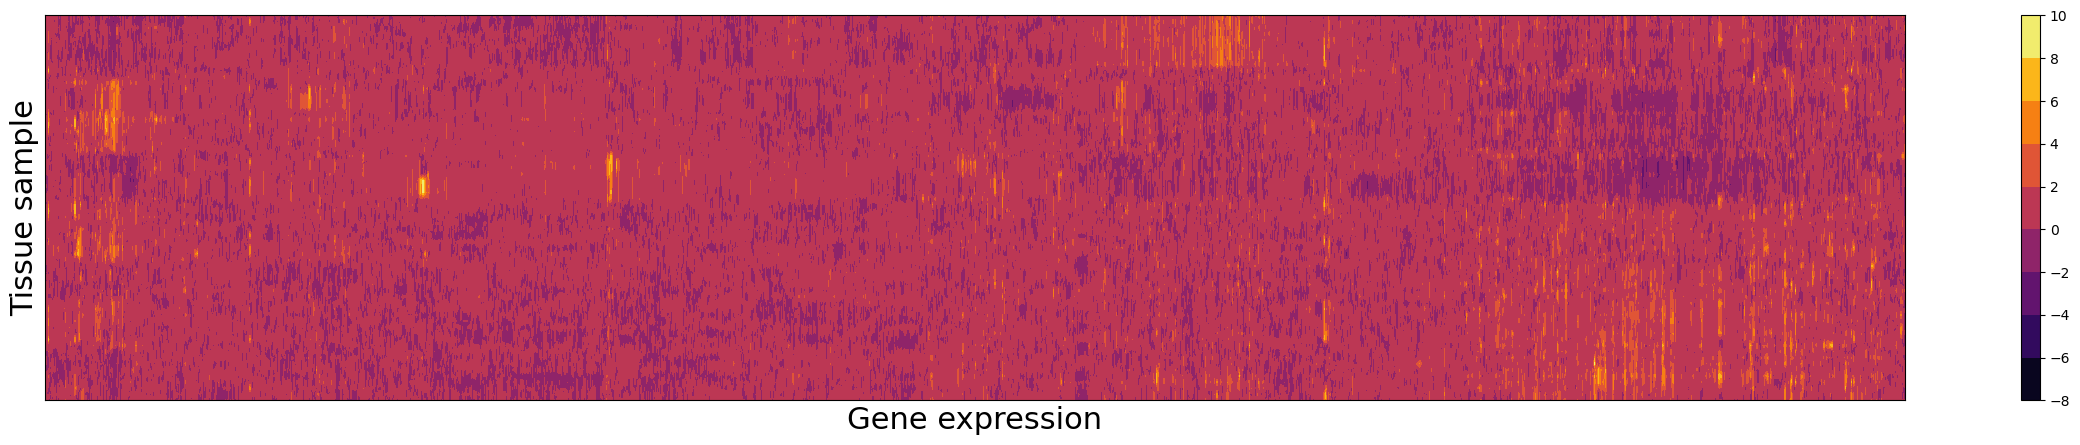

In [26]:
# Contour plot of the gene expression data
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
contours = ax.contourf(X, cmap='inferno')#, vmax=4, vmin=-4)
cbar = plt.colorbar(contours)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Gene expression", fontsize=22)
ax.set_ylabel("Tissue sample", fontsize=22)
plt.show()

We now convert our pandas dataframe into a numpy array and create integer labels for cancer type (for plotting purposes)

If you visualise the labels, you will notice there are lots of inconsistencies with white space etc. Run the following code to clean the labels.

In [27]:
# Print the unique labels and counts
y.value_counts()

0                         
RENAL                         4
OVARIAN                       4
MELANOMA                      3
NSCLC                         3
COLON                         3
BREAST                        2
NSCLC                         2
MELANOMA                      2
NSCLC                         2
LEUKEMIA                      2
PROSTATE                      2
COLON                         2
CNS                           2
CNS                           2
BREAST                        2
RENAL                         2
MELANOMA                      2
RENAL                         1
RENAL                         1
OVARIAN                       1
OVARIAN                       1
NSCLC                         1
NSCLC                         1
RENAL                         1
MCF7D-repro                   1
MELANOMA                      1
BREAST                        1
MCF7A-repro                   1
LEUKEMIA                      1
LEUKEMIA                      1
LEUKEMIA     

In [28]:
my_lab = y.to_numpy().flatten()

In [29]:
for j in range(my_lab.size):
    my_lab[j] = my_lab[j].strip()

In [30]:
types = list(np.unique(my_lab))
types

['BREAST',
 'CNS',
 'COLON',
 'K562A-repro',
 'K562B-repro',
 'LEUKEMIA',
 'MCF7A-repro',
 'MCF7D-repro',
 'MELANOMA',
 'NSCLC',
 'OVARIAN',
 'PROSTATE',
 'RENAL',
 'UNKNOWN']

In [31]:
groups = [types.index(lab) for lab in my_lab]

In [32]:
groups

[1,
 1,
 1,
 12,
 0,
 1,
 1,
 0,
 9,
 9,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 9,
 12,
 13,
 10,
 8,
 11,
 10,
 10,
 10,
 10,
 10,
 11,
 9,
 9,
 9,
 5,
 4,
 3,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 0,
 7,
 0,
 9,
 9,
 9,
 8,
 0,
 0,
 8,
 8,
 8,
 8,
 8,
 8]

In [33]:
# Clean the labels by stripping the white space
y_clean = np.asarray(y).flatten()
for j in range(y_clean.size):
    y_clean[j] = y_clean[j].strip()

cancer_types = list(np.unique(y_clean))
cancer_groups = np.array([cancer_types.index(lab) for lab in y_clean])

In [34]:
print(cancer_types)

['BREAST', 'CNS', 'COLON', 'K562A-repro', 'K562B-repro', 'LEUKEMIA', 'MCF7A-repro', 'MCF7D-repro', 'MELANOMA', 'NSCLC', 'OVARIAN', 'PROSTATE', 'RENAL', 'UNKNOWN']


In [35]:
X_array = np.asarray(X)

### 🚩 Exercise 9 (EXTRA)

Perform a PCA of $\mathbf X$ to visualize the data. Plot the first few principal component scores and color by cancer type. Do cell lines within the same cancer types seems to have similar scores? Make a scree plot of the proportion of variance explained. How many components does this suggest?

In [167]:
from sklearn.decomposition import PCA

PCA(20)

# Hierarchical Clustering: Gene Expression Data <a id='hc_genedata'></a>

Now, let's perform hierarchical clustering on the gene expression data. 

### 🚩 Exercise 10 (CORE)

a) Plot the dendrogram with complete, single, and average linkage. Does the choice of linkage affect the results? Which linkage would you choose?

ValueError: Linkage matrix 'Z' must have 4 columns.

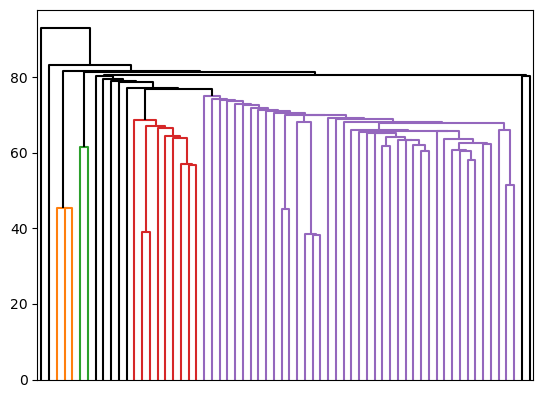

In [73]:
# Fit hierarchical clustering with different types of linkage

sing = hierarchy.linkage(X, method='single')
comp = hierarchy.linkage(X, method='complete')
avg  = hierarchy.linkage(X, method='average')
# Plot the dendogram
cargs = {'color_threshold': 75,'above_threshold_color':'black'}
hierarchy.dendrogram(sing, **cargs, no_labels=True)
cut = hierarchy.cut_tree(X, n_clusters=11)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [45.0, 45.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [57.5, 57.5, 100.0, 100.0],
  [13.75, 13.75, 78.75, 78.75],
  [115.0, 115.0, 125.0, 125.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [152.5, 152.5, 180.0, 180.0],
  [135.0, 135.0, 166.25, 166.25],
  [120.0, 120.0, 150.625, 150.625],
  [46.25, 46.25, 135.3125, 135.3125],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [263.75, 263.75, 310.0, 310.0],
  [245.0, 245.0, 286.875, 286.875],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [365.0, 365.

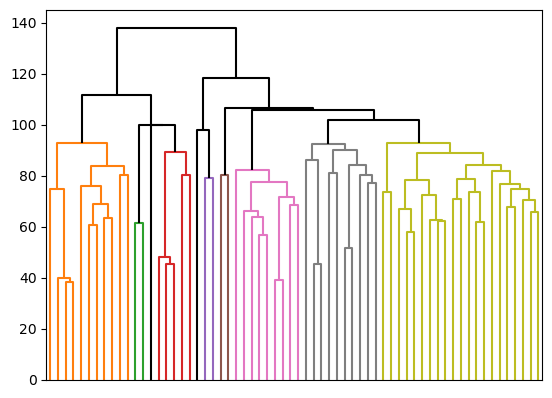

In [64]:
cargs = {'color_threshold': 95,'above_threshold_color':'black'}
hierarchy.dendrogram(comp, **cargs, no_labels=True)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [20.0, 20.0, 56.25, 56.25],
  [5.0, 5.0, 38.125, 38.125],
  [95.0, 95.0, 105.0, 105.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [100.0, 100.0, 124.6875, 124.6875],
  [85.0, 85.0, 112.34375, 112.34375],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [265.0, 265.0, 297.5, 297.5],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 375.0, 385.0, 385.0],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [380.0, 380.0, 402.5, 402.5],
  [365

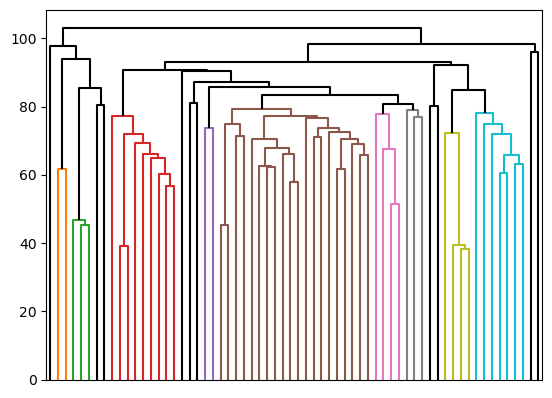

In [63]:
cargs = {'color_threshold': 80,'above_threshold_color':'black'}
hierarchy.dendrogram(avg, **cargs, no_labels=True)

Yes the choice of linkage does impact the clustering. Within single linkage we see long chains forming. This may be more relevant when dealing with geneology since genes are often related and grouping genes through this long chain may capture some internal connection between the different gene strands.

b) Select a linkage and a number of clusters (by examining the dendrogram and jumps in the heights of the clusters merged). Plot the dendogram and color the branches to identify the clusters. Use the option `labels = np.asarray(y_clean), leaf_font_size=10` in `hierarchy.dendrogram` to add the cancer types as labels for each data point. Do you observe any patterns between the clusters and cancer types? You may also want to use `pd.crosstab` to compute a cross-tabulation to compare the clusters and cancer types.

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [135.0, 135.0, 145.0, 145.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [140.0, 140.0, 164.6875, 164.6875],
  [125.0, 125.0, 152.34375, 152.34375],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [445.0, 445.0, 455.0, 455.0],
  [495.0, 495.0, 505.0, 505.0],
  [485.0, 485.0, 500.0, 500.0],
  [475.0, 475.0, 492.5, 492.5],
  [465.0, 465.0, 483.75, 483.75],
  [450.0, 450.0, 474.375, 474.375],
  [435.0, 435.0, 462.1875, 462.1875],
  [425.0, 425.0, 448.59375, 448.59375],
  [415.0, 415.0, 436.796875, 436.796875],
  [555.0, 555.0, 565.0, 565.0],
  [545.0, 545.0, 560.0, 560.0],
  [535.0, 535.0, 552.5, 552.5],
  [575.0, 575.0, 585.0, 585.0],
  [543.75, 543.75, 580.0, 580.0],
  [525.0, 525.0, 561.8

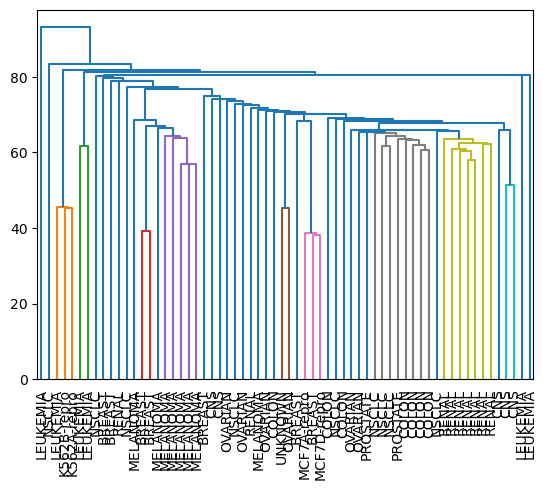

In [ ]:
hierarchy.dendrogram(sing, labels=np.array(y_clean), leaf_font_size=10)

🏁 **Now, is a good point to switch driver and navigator**

# K-means Clustering: Gene Expression Data <a id='kmeans_genedata'></a>

Now, let's perform k-means clustering on the gene expression data.

### 🚩 Exercise 11 (CORE)

Perform K-means clustering with the same number of clusters that you selected for hierarchical clustering. Are the results similar?

In [72]:
x_means = KMeans(n_clusters=10).fit_transform(X)

I'm unsure how to continue here. 

### 🚩 Exercise 12 (EXTRA)

Plot the two clustering solutions along with a plot of the data colored by the cancer types in the space spanned by the first two principal components.

# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please go to Edit -> Edit Notebook Metadata and change 'Student 1' and 'Student 2' in the **name** attribute to include your name.

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [82]:
!jupyter nbconvert --to pdf mlp_week03.ipynb 

[NbConvertApp] Converting notebook mlp_week03.ipynb to pdf
[NbConvertApp] Support files will be in mlp_week03_files/
[NbConvertApp] Making directory ./mlp_week03_files
[NbConvertApp] Writing 118129 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1558445 bytes to mlp_week03.pdf
